# <span style="color:#2939D3;"> DataARC Network Overview Analyses </span>

### Notebook Outline:
1. Notebook Setup
2. View Pandas DataFrames
3. Browse Concepts
4. Initial Visualizations:
    - Network Graph 1: Queries and Concept Groups
    - Network Graph 2: Queries and Concept Titles
5. How to Query Data (Basics)
6. Network Analyses:
    - Centrality:
        - Degree Centrality
        - Closeness Centrality
        - Betweenness Centrality
        - Eigen Vector Centrality
7. Graphing Node Connections with Plotly

## Notebook Setup

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import requests # For making HTTP requests
import json # Work with JSON data
!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display

from operator import itemgetter # For sorting dictionaries

In [2]:
# Pass get() the URLs for combinators, concepts, and combinator-queries.
# Store the response objects in combinators, concepts, and queries.

combinators_response = requests.get('https://api.data-arc.org/combinators')
concepts_response = requests.get('https://api.data-arc.org/concepts')
queries_response = requests.get('https://api.data-arc.org/combinator-queries')

# Print a message to confirm that the request was successful
if combinators_response:
    print('Combinators - success!')
else:
    print('An error has occurred with combinators.')

if concepts_response:
    print('Concepts - success!')
else:
    print('An error has occurred with concepts.')
    
if queries_response:
    print('Queries - success!')
else:
    print('An error has occurred with combinator-queries.')

Combinators - success!
Concepts - success!
Queries - success!


In [3]:
# use the json() method to convert data to Python
combinators = combinators_response.json()
concepts = concepts_response.json()
queries = queries_response.json()

## Pandas DataFrames

In [4]:
# Create Pandas DataFrame for each data set
df_comb = pd.DataFrame(combinators)
df_concepts = pd.DataFrame(concepts)
df_queries = pd.DataFrame(queries)

In [5]:
# Set options to view full column and row data in the Pandas DataFrames

pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)

In [6]:
# View first 5 entries of Combinators dataframe
df_comb.head()

operator  review  \
0      and   False   
1      and   False   
2      and   False   
3      and   False   
4       or   False   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [7]:
# View first 5 entries of Queries dataframe
df_queries.head()

,operator,review,_id,field,value,type,combinator,dataset_field,updatedAt,id
0,greater_than,True,5f41cae1b2e72386408080ea,percent_marine_mammal,,number,"{'operator': 'and', 'review': False, 'concepts': ['5f430a73836c1e48136b4f69', '5f430a73836c1e48136b4f68', '5f430a74836c1e48136b4f7a', '5f430a76836c1e48136b4fd2', '5f430a74836c1e48136b4f8c', '5f430a77836c1e48136b5018', '5f430a76836c1e48136b4fd3'], 'features': [], '_id': '5f41cadfb2e723864080803e', 'title': 'Marine resource dominant', 'citation': 'Schulting, R., Tresset, A., & Dupont, C. (2004). From harvesting the sea to stock rearing along the Atlantic façade of north-west Europe. Environmental Archaeology, 9(2), 143-154.', 'description': 'A preponderance of marine mammal would indicate a greater reliance on or interest in these resources than available terrestrial ones.', 'name': 'marine_resource_dominant', 'dataset': '5f41cae4b2e723864080817d', 'updatedAt': '2020-12-15T23:23:00.033Z', 'refreshed': '2020-12-15T23:23:00.031Z', 'id': '5f41cadfb2e723864080803e'}","{'type': 'number', 'review': True, 'missing': False, '_id': '5f43f24794483c859c865776', 'title': 'Orkneyfauna Percent Marine Mammal', 'name': 'percent_marine_mammal', 'source': 'percent Marine mammal', 'dataset': '5f41cae4b2e723864080817d', 'updatedAt': '2020-12-15T23:21:01.913Z', 'parent': None, 'id': '5f43f24794483c859c865776'}",2020-12-15T23:21:02.218Z,5f41cae1b2e72386408080ea
1,greater_than,True,5f41cae1b2e72386408080c6,relationships_1861_historic_value,1,number,"{'operator': 'and', 'review': False, 'concepts': ['5f430a74836c1e48136b4f90', '5f430a75836c1e48136b4fa7', '5f430a74836c1e48136b4f77', '5f430a76836c1e48136b4fe3', '5f430a76836c1e48136b4fe5'], 'features': ['5fc9e27e7c39e36162af511b', '5fc9e27e7c39e36162af511c', '5fc9e27e7c39e36162af511e', '5fc9e27e7c39e36162af5127', '5fc9e27e7c39e36162af5129', '5fc9e27e7c39e36162af512c', '5fc9e27e7c39e36162af5130', '5fc9e27e7c39e36162af5131', '5fc9e27e7c39e36162af5132', '5fc9e27e7c39e36162af5133', '5fc9e27e7c39e36162af5134', '5fc9e27e7c39e36162af5136', '5fc9e27e7c39e36162af5137', '5fc9e27e7c39e36162af5139', '5fc9e27e7c39e36162af513a', '5fc9e27e7c39e36162af513b', '5fc9e27e7c39e36162af513c', '5fc9e27e7c39e36162af513d', '5fc9e27e7c39e36162af513f', '5fc9e27e7c39e36162af5140', '5fc9e27e7c39e36162af5141', '5fc9e27e7c39e36162af5142', '5fc9e27e7c39e36162af5143', '5fc9e27e7c39e36162af5144', '5fc9e27e7c39e36162af5145', '5fc9e27e7c39e36162af5146', '5fc9e27e7c39e36162af5147', '5fc9e27e7c39e36162af519a', '5fc9e27e7c39e36162af51b3', '5fc9e27e7c39e36162af51ba', '5fc9e27e7c39e36162af51bb', '5fc9e27e7c39e36162af51bf', '5fc9e27e7c39e36162af51c3', '5fc9e27e7c39e36162af51c6', '5fc9e27e7c39e36162af51c9', '5fc9e27e7c39e36162af51d0', '5fc9e27e7c39e36162af51d9', '5fc9e27e7c39e36162af51f0', '5fc9e27e7c39e36162af51f2', '5fc9e27e7c39e36162af51f4', '5fc9e27e7c39e36162af51f6', '5fc9e27e7c39e36162af51f8', '5fc9e27e7c39e36162af51f9', '5fc9e27e7c39e36162af51fb', '5fc9e27e7c39e36162af51fc', '5fc9e27e7c39e36162af51ff', '5fc9e27e7c39e36162af5200', '5fc9e27e7c39e36162af5203', '5fc9e27e7c39e36162af5209', '5fc9e27e7c39e36162af520d', '5fc9e27e7c39e36162af520f', '5fc9e27e7c39e36162af5210', '5fc9e27e7c39e36162af5236', '5fc9e27e7c39e36162af5245', '5fc9e27e7c39e36162af5247', '5fc9e27e7c39e36162af524f', '5fc9e27e7c39e36162af5254', '5fc9e27e7c39e36162af5274', '5fc9e27e7c39e36162af527b', '5fc9e27e7c39e36162af527e', '5fc9e27e7c39e36162af52a1', '5fc9e27e7c39e36162af52a6', '5fc9e27e7c39e36162af52a7', '5fc9e27e7c39e36162af52ab', '5fc9e27e7c39e36162af52b1', '5fc9e27e7c39e36162af52b2', '5fc9e27e7c39e36162af52b3', '5fc9e27e7c39e36162af52b4', '5fc9e27e7c39e36162af52bb', '5fc9e27e7c39e36162af5309', '5fc9e27e7c39e36162af5312', '5fc9e27e7c39e36162af5316', '5fc9e27e7c39e36162af531e', '5fc9e27e7c39e36162af5328', '5fc9e27e7c39e36162af5330', '5fc9e27e7c39e36162af5331', '5fc9e27e7c39e36162af5333', '5fc9e27e7c39e36162af5335', '5fc9e27e7c39e36162af533e', '5fc9e27e7c39e36162af533f', '5fc9e27e7c39e36162af5341', '5fc9e27e7c39e36162af5342', '

In [8]:
# View first 5 entries of concepts dataframe
df_concepts.head()

group  \
0    community_places   
1  physical_landscape   
2  physical_landscape   
3  physical_landscape   
4          activities   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [9]:
# We will create a new DataFrame that stores connections between queries and concepts.

combinator_list = []

for i in range(len(df_comb)):
    query_id = df_comb.loc[i, 'id']
    query = df_comb.loc[i, 'queries']
    query_title = df_comb.loc[i, 'title']
    if df_comb.loc[i, 'concepts'] is not None:
        for j in df_comb.loc[i, 'concepts']:
            group = j['group']
            title = j['title']
            row_tuple = (query_id, group, title, query_title, query)
            combinator_list.append(row_tuple)
    
df_query_concept = pd.DataFrame(combinator_list, columns = ['id', 'group', 'title', 'query_title', 'queries'])

## Browse Concepts

- You can view Concepts in the DataArc Network by using the drop down menu below.
- If you select a Group and leave Title on ALL, the table will display all entries in that Group.
- If you select a Title and leave Group on ALL, the table will display the entry for the selected Title.

In [10]:
# First define a dropdown and populate it with a list of unique group values

# To do this, we will create a generic function, unique_sorted_values_plus_ALL,
# which will find the unique values, sort them, and then add the ALL item at the
# start, so the user could remove the filter

ALL = 'ALL'

def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

output = widgets.Output()

dropdown_group = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_concepts.group))
dropdown_title = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_concepts.title))

# Create a new function, common_filtering, that will be called by both
# the event handlers. This function will apply a filter on the dataframe for both Group AND
# Title:

# We are clearing the output, then we check if any of the values is ALL, in which case
# we consider that the respective filter is removed. When both filters are present, in the else
# statement, we apply the & operation in both filters. Finally we capture the output

def common_filtering(group, title):
    output.clear_output()
    
    # if group and title set to ALL, then show all entries in concepts
    if (group == ALL) & (title == ALL):
        common_filter = df_concepts
    # if group = ALL but not title, then just show the entry for the chosen title
    elif (group == ALL):
        common_filter = df_concepts[df_concepts.title == title]
    # if title = ALL but not group, then display all entries in the group
    elif (title == ALL):
        common_filter = df_concepts[df_concepts.group == group]
        
    else:
        common_filter = df_concepts[(df_concepts.group == group) & 
                                  (df_concepts.title == title)]
    
    with output:
        display(common_filter)

def dropdown_group_eventhandler(change):
    common_filtering(change.new, dropdown_title.value)
def dropdown_title_eventhandler(change):
    common_filtering(dropdown_group.value, change.new)

dropdown_group.observe(dropdown_group_eventhandler, names='value')
dropdown_title.observe(dropdown_title_eventhandler, names='value')

In [11]:
# arrange input widgets horizontally
# The HBox will add widgets to it one at a time from left-to-right.

input_widgets = widgets.HBox(
    [dropdown_group, dropdown_title])

display(input_widgets)

display(output)

Output()

## Initial Visualizations

### Network Graph 1: Queries and Concept Groups 

- Let's build a simple NetworkX graph that will connect Queries to Concepts by 'Group'.
- Queries and Groups are nodes and edges are the connections between them.

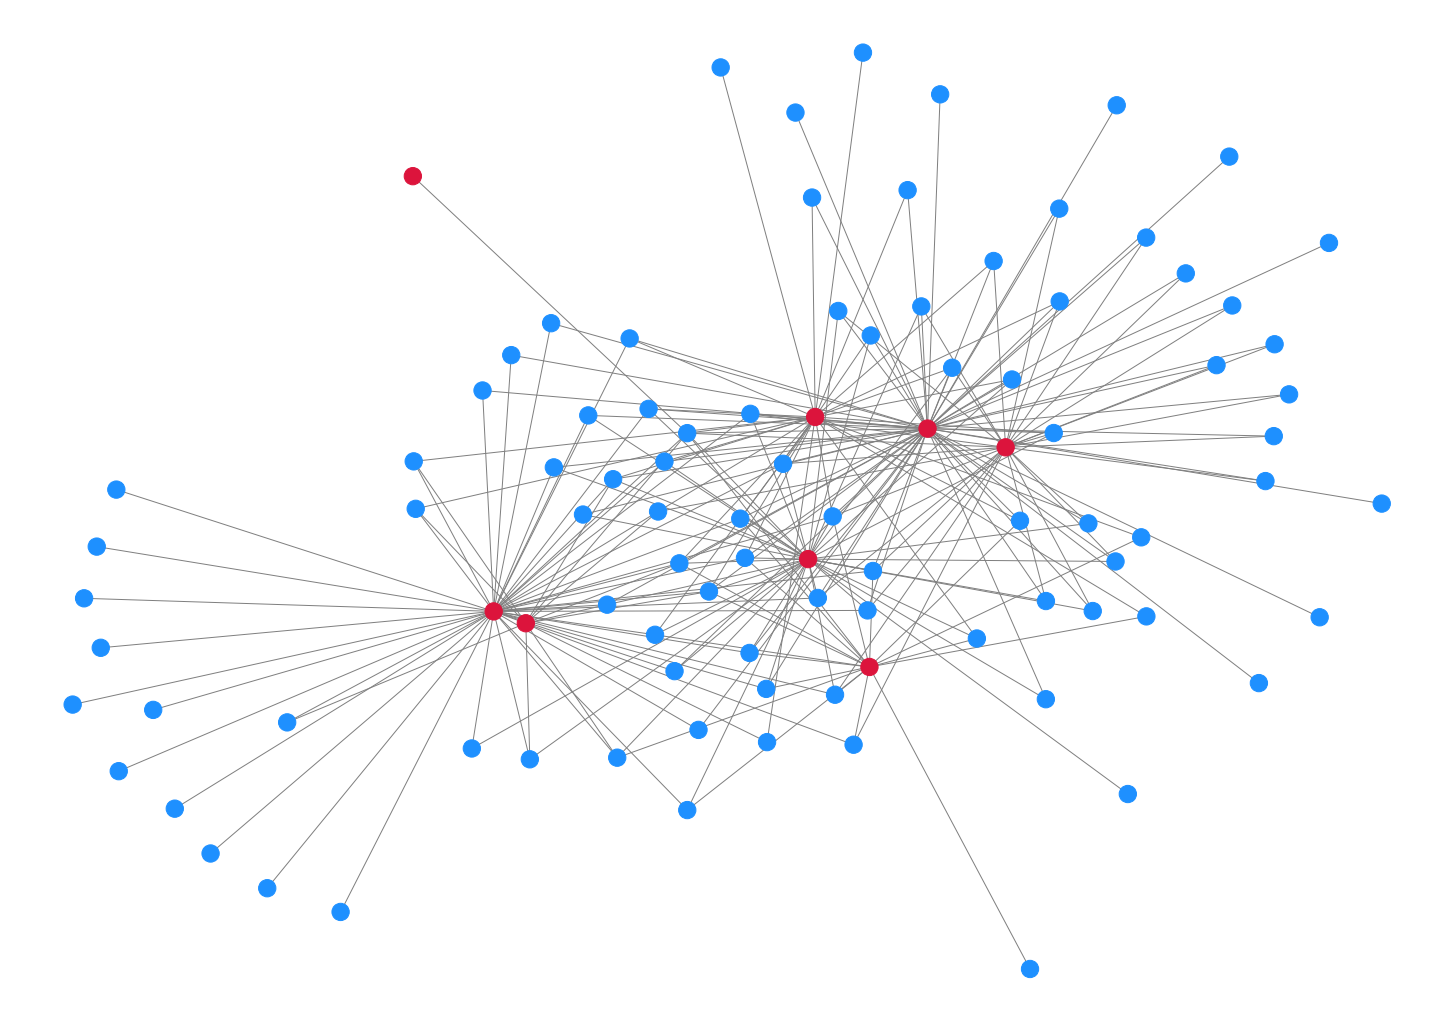

In [12]:
G = nx.Graph() # create empty graph
G = nx.from_pandas_edgelist(df_query_concept, 'query_title', 'group')

colors = [] # colors queries blue and concept (group) red

for node in G:
    if node in df_query_concept["group"].values:
        colors.append("crimson")
    else:
        colors.append("dodgerblue")

plt.figure(figsize=(20,14))

# Spring layout gives the best visualization of clusters
nx.draw_spring(G, with_labels=False, edge_color = "gray", node_color = colors) # do not display node labels

In [13]:
# Create a new DataFrame to store the number of connections in ascending order

# Create an empty dictionary
query_group_connections = {}

# Populate the dictionary using a for loop that returns connections
for node in G.nodes:
    query_group_connections[node] = len(G[node])

# Create a series out of the dictionary
s = pd.Series(query_group_connections, name='connections')

# Convert the series to a Pandas Dataframe
dfs = s.to_frame()

# Sort the number of connections in ascending order, then display
dfs.sort_values(by=['connections'], inplace=True)
dfs

# Note that the left column shows all nodes (both queries and groups)

,connections
Insects in dry dead wood,1
Halotolerant insects,1
Insect indicators of fresh water (i.e. not seawater),1
Insect indicators of heathland or moorland,1
Insect indicators of deciduous trees,1
Wild Species Only,1
Insect indicators for standing water,1
Insect data available,1
Tephrochronology: Colonisation,1
Insect indicators of mould,1


### Network Graph 2: Queries and Concept Titles

- Let's build a simple NetworkX graph that will connect Queries to Concepts by 'Title'.
- Queries and Titles are nodes and edges are the connections between them.

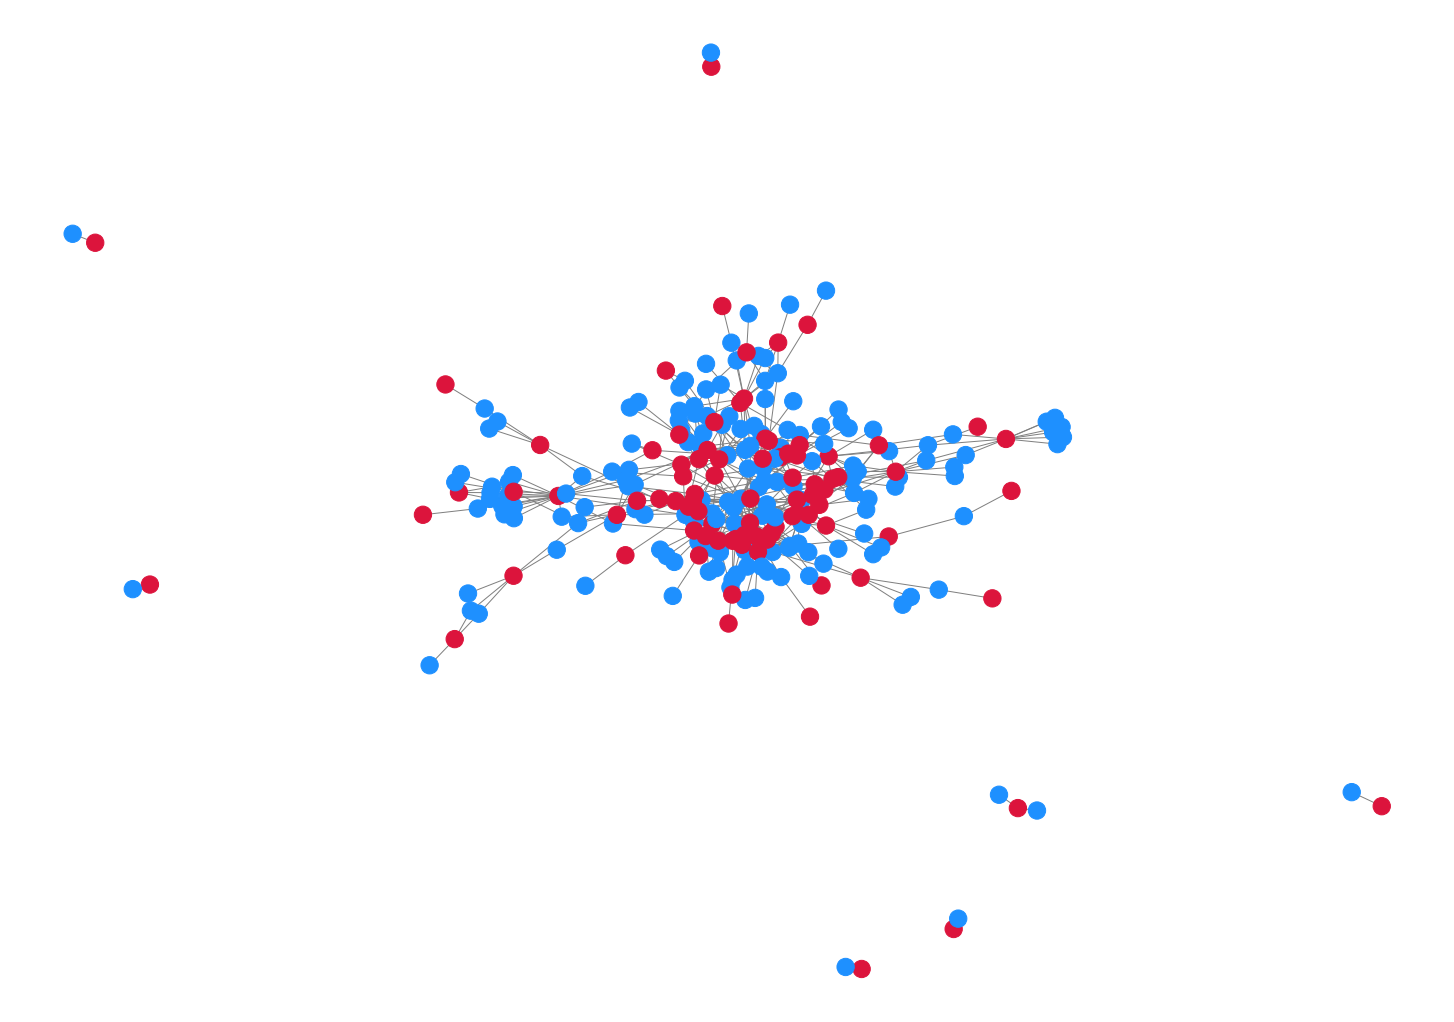

In [14]:
G2 = nx.Graph() 
G2 = nx.from_pandas_edgelist(df_query_concept, 'query_title', 'title')

colors = []

for node in G2:
    if node in df_query_concept["title"].values:
        colors.append("dodgerblue")
    else:
        colors.append("crimson")

plt.figure(figsize=(20,14))

# Using spring layout
nx.draw_spring(G2, with_labels=False, edge_color = "grey", node_color = colors)

In [15]:
query_title_connections = {}

for node in G2.nodes:
    query_title_connections[node] = len(G2[node])

s2 = pd.Series(query_title_connections, name='connections')
dfs2 = s2.to_frame()
dfs2.sort_values(by=['connections'], inplace=True)
dfs2

# Note that the left column shows all nodes (both queries and groups)

,connections
Insects in dry dead wood,1
radiocarbon,1
Radiocarbon dated SEAD sample,1
communal building,1
tenant farm,1
Insect indicators of mould,1
mouldy area,1
food,1
Insect indicators of coniferous trees,1
coniferous trees,1


## How to Query Data (Basics)

In [16]:
# Print short summary of information for the graph G or the node n.
# Queries and Groups
print(nx.info(G)) 

Name: 
Type: Graph
Number of nodes: 97
Number of edges: 237
Average degree:   4.8866


In [17]:
# Queries and Titles
print(nx.info(G2)) 

Name: 
Type: Graph
Number of nodes: 256
Number of edges: 447
Average degree:   3.4922


In [18]:
# Returns list of nodes
# Uncomment below code to view nodes
# G.nodes()

In [19]:
# Returns nodes along with their attributes (in the form of dictionary)
# There are no attributes yet so I am commenting this out for now
# G.nodes(data=True)

In [20]:
# Returns a list of tuples. Each tuple represents an edge.
# Uncomment below code to view list
# G.edges()

## Network Analyses

## Centrality

- Centrality helps us identify the important nodes in a  graph.
- Centrality is used to measure the importance of various nodes in a graph.
- Centrality as in how 'central' a node is in the graph.
- Nodes are important based on how we define importance. 
- Each centrality metric defines the importance of a node from a different perspective.

### Degree Centrality

- The degree of a node is the number of direct connections a node has with other nodes.
- Degree Centrality metric defines importance of a node in a graph as being measured based on its degree - the higher the dgree of the node, the more important it is in the graph.
- (Number of Neighbors I Have) / (Number of Neighbors I Could Possible Have)

### Closeness Centrality

- The Geodesic distance d between two nodes a and b is defined as the number of edges between these two nodes on the shortest path (path with minimum number of edges) between them.
- Mathematically, Geodesic distance can be defined as below:
    - d(a,b) = Number of edges between a and b on the shortest path from a to b, if a path exists from a to b
    - d(a,b) = 0, if a = b
    - d(a,b) = Infinity, if no path exists from a to b
- Closeness centrality defines the importance of a node in a graph as being measured by how close it is to all other nodes in the graph.
    - For a node, it is defined as the sum of the geodesic distance between that node to all other nodes in the network.

### Betweenness Centrality
- Betweenness Centrality defines and measures the importance of a node in a network based upon how many times it occurs in the shortest path between all pairs of nodes in a graph.
- Betweenness Centrality can find bridge nodes in graphs.
    - Nodes with high BC are the nodes that are on the shortest paths between a large number of pair of nodes and hence are crucial since they connect a high number of nodes with each other. Removing these no
- Betweenness centrality assumes that the nodes which connect most of the other nodes in the shortest possible way are most important.
- All shortest paths is a set of shortest paths between all pairs of nodes in a given network. Betweenness Centrality of a node is defined as --(Number of shortest paths through node) / (All possible shortest paths)

### Eigen Vector Centrality

- This metric measures the importance of a node in a graph as a function of the importance of its neighbors.
- If a node is connected to highly important nodes, it will have a higher Eigen Vector Centrality score as compared to a node which is connected to lesser important nodes.

## Network Graph 1 Analysis (Queries and Concepts by Group)

### Degree Centrality

In [21]:
# Compute the degree centrality for nodes.
# The degree centrality for a node v is the fraction of nodes it is connected to.

# Note: The degree centrality values are normalized by dividing the maximum possible degree in a simple
# graph n-1 where n is the number of nodes in G.

dc = nx.degree_centrality(G)

# Sort dictionary in descending order
sorted(dc.items(), key=itemgetter(1), reverse=True)

[('actors', 0.6145833333333333),
 ('physical_landscape', 0.4895833333333333),
 ('activities', 0.41666666666666663),
 ('ideas', 0.3125),
 ('events', 0.3020833333333333),
 ('community_places', 0.19791666666666666),
 ('physical_processes', 0.125),
 ('Saga references to wetlands', 0.08333333333333333),
 ('Driftwood and beached whale claims', 0.0625),
 ('Settlement Age farmsteads', 0.0625),
 ('Rich and Fertile Farms', 0.0625),
 ('Saga references to timber and/or woodland', 0.05208333333333333),
 ('Mixed livestock economy', 0.05208333333333333),
 ('Maritime travel in sagas', 0.05208333333333333),
 ('Saga references to livestock', 0.05208333333333333),
 ('Finds from building contexts', 0.05208333333333333),
 ('We have Pigs', 0.041666666666666664),
 ('Tephrochronology: Viking Period', 0.041666666666666664),
 ('Farmsteads with above average historical value', 0.041666666666666664),
 ('Saga references to agricultural buildings or structures',
  0.041666666666666664),
 ('Artefactual evidence for 

### Closeness Centrality

In [22]:
# Compute the closeness centrality for nodes.
# The higher values of closeness indicate higher centrality.

cc = nx.closeness_centrality(G)
sorted(cc.items(), key=itemgetter(1), reverse=True)

[('actors', 0.588957055214724),
 ('Saga references to wetlands', 0.5217391304347826),
 ('physical_landscape', 0.5133689839572193),
 ('Driftwood and beached whale claims', 0.5106382978723404),
 ('Settlement Age farmsteads', 0.5106382978723404),
 ('Rich and Fertile Farms', 0.5106382978723404),
 ('Saga references to timber and/or woodland', 0.5052631578947369),
 ('Saga references to livestock', 0.5052631578947369),
 ('Mixed livestock economy', 0.5),
 ('Maritime travel in sagas', 0.5),
 ('We have Pigs', 0.4948453608247423),
 ('Saga evidence for coastal activity and/or resources', 0.4948453608247423),
 ('Finds from building contexts', 0.4897959183673469),
 ('Artefacts from domestic house excavations', 0.48484848484848486),
 ('Monastery as a place of production', 0.48484848484848486),
 ('Artefactual evidence for fishing', 0.48484848484848486),
 ('activities', 0.47761194029850745),
 ('Saga references to agricultural activities', 0.4752475247524752),
 ('Saga references to agricultural building

### Betweenness Centrality

In [23]:
# Compute the shortest-path betweenness centrality for nodes.
bc = nx.betweenness_centrality(G)
sorted(bc.items(), key=itemgetter(1), reverse=True)

[('actors', 0.4248194696886604),
 ('physical_landscape', 0.33172405589953835),
 ('activities', 0.14754124457589968),
 ('ideas', 0.13414326497335688),
 ('events', 0.07751863562201958),
 ('community_places', 0.053508075276978644),
 ('Saga references to wetlands', 0.04275989827450436),
 ('Driftwood and beached whale claims', 0.017046274606804357),
 ('Settlement Age farmsteads', 0.016629131772593758),
 ('Rich and Fertile Farms', 0.016629131772593758),
 ('physical_processes', 0.015832973261792175),
 ('Saga references to timber and/or woodland', 0.012740458888119964),
 ('Saga references to livestock', 0.012740458888119964),
 ('Maritime travel in sagas', 0.012413340505874278),
 ('Mixed livestock economy', 0.012399468474482762),
 ('Finds from building contexts', 0.011332280007134033),
 ('We have Pigs', 0.008952818509179242),
 ('Saga evidence for coastal activity and/or resources', 0.008952818509179242),
 ('Artefacts from domestic house excavations', 0.007996023852424173),
 ('Artefactual eviden

### Eigen Vector Centrality

In [24]:
# Compute the eigenvector centrality for the graph G.
# Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors.
evc = nx.eigenvector_centrality(G)
sorted(evc.items(), key=itemgetter(1), reverse=True)

[('actors', 0.40959044433468933),
 ('activities', 0.3323207216450352),
 ('physical_landscape', 0.3174551969047584),
 ('ideas', 0.21660121099383747),
 ('events', 0.2097443445998372),
 ('Saga references to wetlands', 0.15051861818788836),
 ('community_places', 0.14905693071650358),
 ('Driftwood and beached whale claims', 0.1417680949776706),
 ('Settlement Age farmsteads', 0.13119752482572045),
 ('Rich and Fertile Farms', 0.13119752482572045),
 ('Mixed livestock economy', 0.12884179220324016),
 ('Saga references to timber and/or woodland', 0.12357894476178077),
 ('Saga references to livestock', 0.12357894476178077),
 ('Finds from building contexts', 0.12298431336378668),
 ('Maritime travel in sagas', 0.11827122205129005),
 ('We have Pigs', 0.11065264198735036),
 ('Saga evidence for coastal activity and/or resources', 0.11065264198735036),
 ('Saga references to agricultural buildings or structures',
  0.11005801058935626),
 ('Wooden artefacts', 0.11005801058935626),
 ('Freshwater Fish', 0.

### Function template to find the three nodes with the highest ____ centrality

In [25]:
# Define find_nodes_with_highest_bet_cent()
# We can substitute any of the Centrality Measures into this function
def find_nodes_with_highest_bet_cent(G):
    
    ''' Finds the three nodes with the highest betweenness centrality.'''

    # Compute the betweenness centrality of G: bet_cent
    bet_cent = nx.betweenness_centrality(G)
    # Compute the maximum betweenness centrality: max_bc
    max_1_bc = max(list(bet_cent.values()))
    max_2_bc = list(sorted(bet_cent.values()))[-2]
    max_3_bc = list(sorted(bet_cent.values()))[-3]

    maxnode1 = set()
    maxnode2 = set()
    maxnode3 = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_1_bc:

            # Add the current node to the set of nodes
            maxnode1.add(k)
        if v == max_2_bc:

            # Add the current node to the set of nodes
            maxnode2.add(k)
        if v == max_3_bc:

            # Add the current node to the set of nodes
            maxnode3.add(k)

    return maxnode1,maxnode2,maxnode3

# Call function
top_bc,top2_bc,top3_bc = find_nodes_with_highest_bet_cent(G)
print(top_bc,top2_bc,top3_bc)

{'actors'} {'physical_landscape'} {'activities'}


## Network Graph 2 Analysis (Queries and Concepts by Title)

### Degree Centrality

In [26]:
# Compute the degree centrality for nodes.
# The degree centrality for a node v is the fraction of nodes it is connected to.

# Note: The degree centrality values are normalized by dividing the maximum possible degree in a simple
# graph n-1 where n is the number of nodes in G.

dc2 = nx.degree_centrality(G2)

# Sort dictionary in descending order
sorted(dc2.items(), key=itemgetter(1), reverse=True)

[('humans', 0.11764705882352941),
 ('Saga references to livestock', 0.0784313725490196),
 ('Saga references to wetlands', 0.07450980392156863),
 ('production', 0.07058823529411765),
 ('Saga references to agricultural buildings or structures',
  0.054901960784313725),
 ('Woodland claims', 0.054901960784313725),
 ('Saga references to timber and/or woodland', 0.054901960784313725),
 ('Driftwood and beached whale claims', 0.050980392156862744),
 ('animal', 0.047058823529411764),
 ('agricultural landscape', 0.047058823529411764),
 ('Saga references to agricultural activities', 0.047058823529411764),
 ('Maritime travel in sagas', 0.047058823529411764),
 ('Tephrochronology: Historic Tephra Layers', 0.047058823529411764),
 ('Settlement Age farmsteads', 0.043137254901960784),
 ('animal husbandry', 0.0392156862745098),
 ('Tephrochronology: Viking Period', 0.0392156862745098),
 ('Artefacts from domestic house excavations', 0.0392156862745098),
 ('Mixed livestock economy', 0.0392156862745098),
 ('

### Closeness Centrality

In [27]:
# Compute the closeness centrality for nodes.
# The higher values of closeness indicate higher centrality.
cc2 = nx.closeness_centrality(G2)
sorted(cc2.items(), key=itemgetter(1), reverse=True)

[('humans', 0.31814415907207955),
 ('Driftwood and beached whale claims', 0.28848320937570426),
 ('Marine resource dominant', 0.2870169668884072),
 ('Mixed livestock economy', 0.28484533788294636),
 ('Woolen artefacts', 0.28412874583795783),
 ('Evidence for woolworking from artefacts', 0.28412874583795783),
 ('production', 0.28377180017735737),
 ('farm', 0.28306059265811584),
 ('agricultural landscape', 0.280251058239673),
 ('Bone finds', 0.27990378307456815),
 ('Settlement Age farmsteads', 0.2792118083327274),
 ('Saga references to livestock', 0.27852324653659244),
 ('Finds from building contexts', 0.27783807249837206),
 ('Artefacts from domestic house excavations', 0.27715626127751714),
 ('power', 0.27546628407460544),
 ('Leather artefacts', 0.2744621542420127),
 ('animal husbandry', 0.2728047740835465),
 ('Wooden artefacts', 0.27181991930346144),
 ('Artefactual evidence for cultivation', 0.27181991930346144),
 ('animal', 0.27149321266968324),
 ('Feather artefacts', 0.271167290445589

### Betweenness Centrality

In [28]:
# Compute the shortest-path betweenness centrality for nodes.
bc2 = nx.betweenness_centrality(G2)
sorted(bc2.items(), key=itemgetter(1), reverse=True)

[('humans', 0.27625363056550895),
 ('production', 0.12957152718057605),
 ('Saga references to wetlands', 0.11933725879519083),
 ('Saga references to livestock', 0.08767120788225963),
 ('agricultural landscape', 0.07960580469223334),
 ('Settlement Age farmsteads', 0.07603356535627527),
 ('Saga references to agricultural buildings or structures',
  0.0734212648116518),
 ('animal', 0.07330976980958237),
 ('Driftwood and beached whale claims', 0.0632932228558894),
 ('Woodland claims', 0.0632636000047876),
 ('Artefactual evidence for fishing', 0.05465285933729137),
 ('aquatics', 0.05355361018117923),
 ('Maritime travel in sagas', 0.053416246442439884),
 ('Saga references to timber and/or woodland', 0.04944382254516209),
 ('Artefacts from domestic house excavations', 0.04926568036275856),
 ('Tephrochronology-  Little Ice Age', 0.04717041955978065),
 ('managed landscape area', 0.04709912989984277),
 ('Tephrochronology: Historic Tephra Layers', 0.046524849463539804),
 ('Tephrochronology: Vikin

### Eigen Vector Centrality

In [29]:
# Compute the eigenvector centrality for the graph G.
# Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors.
evc2 = nx.eigenvector_centrality(G2)
sorted(evc2.items(), key=itemgetter(1), reverse=True)

[('humans', 0.38244917137817447),
 ('production', 0.260790724487213),
 ('Saga references to livestock', 0.2412753232176553),
 ('animal', 0.20899304990311474),
 ('animal husbandry', 0.1900542790637958),
 ('Marine resource dominant', 0.16978478781588402),
 ('Woolen artefacts', 0.1646701814437876),
 ('Evidence for woolworking from artefacts', 0.1646701814437876),
 ('Saga references to agricultural buildings or structures',
  0.15669314086722205),
 ('Leather artefacts', 0.1477641597808323),
 ('agricultural landscape', 0.14565758966298867),
 ('Bone finds', 0.1449751046315243),
 ('Saga references to agricultural activities', 0.1434694166827203),
 ('Mixed livestock economy', 0.14220364809102873),
 ('cultivation / farming', 0.12873744250886998),
 ('butchery', 0.128154360439802),
 ('managed landscape area', 0.1244979538387235),
 ('farm', 0.12023238950183848),
 ('Driftwood and beached whale claims', 0.11522817085770133),
 ('Ectoparasites', 0.10874718365929177),
 ('Feather artefacts', 0.107509162

## Intermediate Visualizations

- A network graph reveals patterns and helps to detect anomalies.
- What do we want in these visualizations?
    - I want to customize graphical representation, such as color coding nodes and edges based on an attribute. We can also vary edge width based on a value. 
        - In this way, it is easy to quickly understand the network graph.
    - An interactive application
        - When the user hovers on a node (or edge), rich information will show.
        - Additionally, the user should be able to type or use a drop down menu to search/filter. Then in response the application will display the network graph accordingly.

- Plotly and ipywidgets allow interactive data analysis in Jupyter notebook.
- Dash is an open source Python library for creating reactive web applications.
    - Dash allows seamless integration of Python data analaysis code with front-end HTML, CSS, and Javascript.
    - With the Python interface and reactive decorators provided by Dash, the Python data analysis code is binded to the interactive web-based components,
    - Dash is built on Flask framework and React.js for frontend rendering. 
    - Dash is fully compatible with Plotly as a component in the Dash application and further add other web-based components to interact with data analysis code.

## Graphing Node Connections with Plotly:

In [30]:
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [31]:
# isolate group and query_title and then get unique values from them to get total number of nodes
# We do this by taking unique values in both columns and joining them together.
A = list(df_query_concept["group"].unique())
B = list(df_query_concept["query_title"].unique())
node_list = set(A+B)

In [32]:
# Create the graph
G = nx.Graph()

# Graph api to create an empty graph. The below code will create nodes and edges and add them
# to the graph.

for i in node_list:
    G.add_node(i)

# Uncomment below code to see the nodes list.
#G.nodes()

for i,j in df_query_concept.iterrows():
    G.add_edges_from([(j["group"],j["query_title"])])

In [33]:
# Get positions for each node.
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Uncomment below code to see the positions of all nodes.
#pos

for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [34]:
# Add nodes and edges to the plotly api
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [35]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        # https://plotly.com/python/builtin-colorscales/
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=13,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [36]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [37]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Node Connections: Queries and Concept Groups',
                titlefont=dict(size=20),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

In [38]:
C = list(df_query_concept["title"].unique())
D = list(df_query_concept["query_title"].unique())
node_list2 = set(C+D)

In [39]:
G2 = nx.Graph()

for i in node_list2:
    G2.add_node(i)

for i,j in df_query_concept.iterrows():
    G2.add_edges_from([(j["title"],j["query_title"])])

In [40]:
pos2 = nx.spring_layout(G2, k=0.5, iterations=50)

for n, p in pos2.items():
    G2.nodes[n]['pos'] = p

In [41]:
edge_trace2 = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G2.edges():
    x0, y0 = G2.nodes[edge[0]]['pos']
    x1, y1 = G2.nodes[edge[1]]['pos']
    edge_trace2['x'] += tuple([x0, x1, None])
    edge_trace2['y'] += tuple([y0, y1, None])

In [42]:
node_trace2 = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        # https://plotly.com/python/builtin-colorscales/
        colorscale='plasma',
        reversescale=False,
        color=[],
        size=11,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G2.nodes():
    x, y = G2.nodes[node]['pos']
    node_trace2['x'] += tuple([x])
    node_trace2['y'] += tuple([y])

In [43]:
for node, adjacencies in enumerate(G2.adjacency()):
    node_trace2['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace2['text']+=tuple([node_info])

In [44]:
fig2 = go.Figure(data=[edge_trace2, node_trace2],
             layout=go.Layout(
                title='<br>Node Connections: Queries and Concept Titles',
                titlefont=dict(size=20),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig2)

## Future Projects:

### Graph Centrality Measures using Plotly


### Stagnancy
- What data has not been updated recently? 
- We can sort data based on recent updates. 
- It can also be useful to identify data that has become stagnant.